#**Linear Regression with Pytorch**


Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression

In this tutorial we build a model from scratch that is as works as Linear Regression. And we presict the crop yield of apples and oranges . We have the data of different regions like kanto ,etc and we can train our model on this data and predict the crop yield of apples and oranges. Rainfall,humidity and temperature are `input variables` and Apples and Oranganes are `Output Variables`.Training data is here.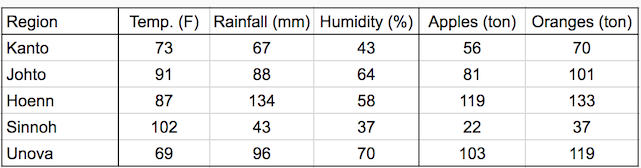

In a Linear regression each target variable is estimated to be a weighted sum of input variable , offset by some constant known as bias.


yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1


yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2

Visually, it means that the yield of apples is a linear or planar function of temperature, rainfall and humidity:

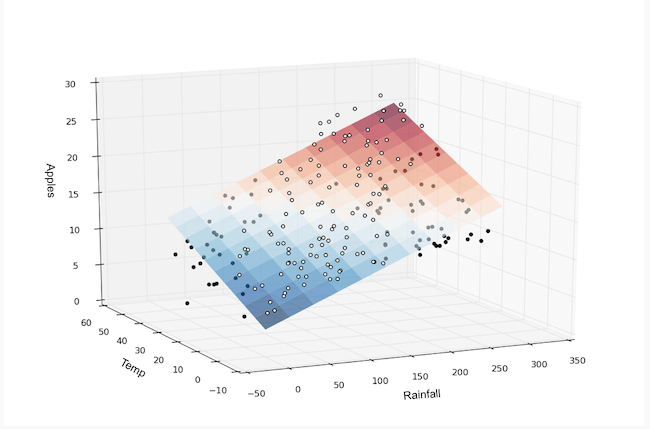

The learning part of linear regression is to figure out a set of weights w11, w12,... w23, b1 & b2 using the training data, to make accurate predictions for new data. The learned weights will be used to predict the yields for apples and oranges in a new region using the average temperature, rainfall, and humidity for that region.

We'll train our model by adjusting the weights slightly many times to make better predictions, using an optimization technique called gradient descent. Let's begin by importing Numpy and PyTorch.

In [1]:
import numpy as np
import torch

# Trainig Data 

We can divide our data in the inputs and targets variable . Each row indicates onw record from data and each column indicates the column from data 

In [2]:
# Input Variables(Temperature , Rainfall , Humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [3]:
# Target Variables (Apples , Oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

We've separated the input and target variables because we'll operate on them separately. Also, we've created numpy arrays, because this is typically how you would work with training data: read some CSV files as numpy arrays, do some processing, and then convert them to PyTorch tensors.

Let's convert them to Pytorch Tensors.

In [4]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


# **Linear regression from Scratch**

Weight and Biases are also represented as metrics and they intialized by a  random number. Similarly the first row of inputs multiply with random weights and than add with bias.

In [6]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.2425, -0.4116,  1.2210],
        [ 0.3070,  1.7788, -0.0659]], requires_grad=True)
tensor([-0.9716, -1.2046], requires_grad=True)


`torch.randn` creates a tensor of random numbers from a [normal distribuation](https://www.wikiwand.com/en/Normal_distribution) with the mean of 0 and standard deviation of 1

Our model is just a function that can be multiply with weights and add them the bias and is again and again repeat for every row. 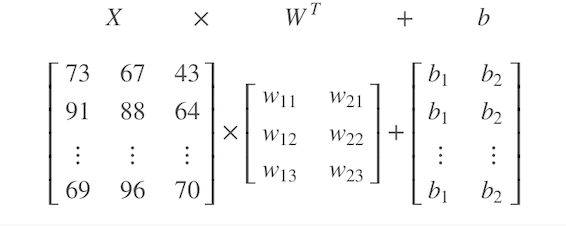


Our model is just a matrix multiplication of imput and weights(transposed) and then adds bias.

we can define the model as this


In [7]:
def model(x):
    return x @ w.t() + b

That model is simply a matrix multiplication with weights(transposed) and then it adds the bias in it

In [9]:
pred = model(inputs)
pred

tensor([[ 41.6572, 137.5543],
        [ 63.0198, 179.0514],
        [ 35.7895, 260.0449],
        [ 51.2428, 104.1619],
        [ 61.7177, 186.1318]], grad_fn=<AddBackward0>)

Now this is our Predictions .Let's compare them with original target values

In [10]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


So, as we see there is a huge difference betweeen the predictions and our actuall values because with random weight and bias we can't expect the prediction at good scale

# Loss Function

Before we improve our model .Let's know that how well our model is performing .We can compare model predictions and actual values using this formiula 


1.   Calculate the difference between the two matrices (preds and targets).
2.   Square all elements of the difference matrix to remove negative values
3.   Calculate the average of the elements in the resulting matrix.


**The result is single number which is a Mean Squared Error(MSE)**


In [11]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [13]:
# Compute loss
loss = mse(pred, targets)
print(loss)

tensor(4582.5752, grad_fn=<DivBackward0>)


# Compute gradients

In [14]:
# Compute gradients
loss.backward()

In [15]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.2425, -0.4116,  1.2210],
        [ 0.3070,  1.7788, -0.0659]], requires_grad=True)
tensor([[-1957.6517, -3279.8206, -1680.2931],
        [ 6913.9287,  7550.2559,  4490.5874]])


## **Adjust weights and biases to reduce the loss**

In [16]:
w
w.grad

tensor([[-1957.6517, -3279.8206, -1680.2931],
        [ 6913.9287,  7550.2559,  4490.5874]])

In [20]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

In [21]:
# Let's verify that the loss is actually lower
loss = mse(pred, targets)
print(loss)

tensor(4582.5752, grad_fn=<DivBackward0>)


In [22]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


# Train the model using gradient descent

For training model using gradient descent we use these steps.


> Generate predictions

> Calculate the loss

> Compute gradients w.r.t the weights and biases

> Adjust the weights by subtracting a small quantity proportional to the gradient

> Reset the gradients to zero



In [23]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ 50.3559, 113.4791],
        [ 74.5065, 147.4300],
        [ 49.9353, 222.5692],
        [ 59.3009,  80.2396],
        [ 73.0694, 155.8056]], grad_fn=<AddBackward0>)


In [24]:
# Calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(2242.4282, grad_fn=<DivBackward0>)


In [25]:
# Compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-1054.4143, -2294.7295, -1075.8080],
        [ 4428.3296,  4878.7710,  2842.4785]])
tensor([-14.7664,  51.9047])


In [26]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [27]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(1704.4271, grad_fn=<DivBackward0>)


# Train for multiple epochs

In [32]:
# Train for 1500 epochs
for i in range(150):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [33]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(94.2313, grad_fn=<DivBackward0>)


In [34]:
# predictions
preds

tensor([[ 58.4836,  70.8078],
        [ 88.1121,  93.2370],
        [103.1402, 149.0581],
        [ 30.1991,  40.3057],
        [106.6802, 104.0483]], grad_fn=<AddBackward0>)

In [35]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

The predictions are now close to the target values . So, we can get better results with doing more epochs.